## Punto 2
Un objeto cae verticalmente en el aire está sujeto a una resistencia viscosa y también ala fuerza de gravedad. Suponga que dejamos caer un objeto de masa $m$ desde una altura $s_o$ y que la altura del objeto después de $t$ segundos es
$$
s(t) = s_o - \frac{mg}{k}t + \frac{m^2g}{k}(1 - e^{-kt/m})
$$
donde $g = 32.17 ft/s^2$ y $k$ representa el coeficiente de resistencia del aire en $lb - s/pies$ Suponga que $s_o =3300 ft$ y $k = 0.1lb/ft$

In [1]:
import pymethods as pm
import math
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
g = 32.17
s_o = 3300
k = 0.1

In [3]:
tol = 0.00001 * (1/100)

### solución 2.a

In [4]:
m = 1/4

In [5]:
s = lambda t: s_o - (((m * g) / k) * t) + ((m**2 * g)/k)*(1 - math.exp((-1*k *t)/m))

In [6]:
s(0)

3300.0

In [7]:
s(50)

-701.1437500414421

In [8]:
a, b = (0, 50)

In [9]:
t_stimate = pm.bisection(s, a, b, tol)

In [10]:
t_stimate, s(t_stimate)

(41.28201739076758, -7.391491863018018e-09)

In [11]:
assert s(t_stimate) <= tol # esto prueba que el resultado es menor que la tolerancia

### solución punto 2.b

In [12]:
t_stimate = pm.false_position(s, a, b, tol)

In [13]:
t_stimate, s(t_stimate)

(41.282017390461, 1.7265364249396953e-08)

In [14]:
assert s(t_stimate) <= tol

### Punto 3

Determine el polinomio de Taylor $P_5(x)$ para la función $f(x) = \sin^{-1}(x)$ en torno a $x_0 = 0.75$

- Use $P_5(1)$ para aproximar $f(1)$
- Determine una cota superior para el error $|f(1) - P_5(1)|$ por medio de la fórmula del error, es decir $R_5(1)$
- Aproxime $\int_{0.75}^{1}f(x)$ usando $\int_{0.75}^{1}P_5(x)dx$ y calcule el error absoluto y relativo.
- Realice una gráfica del polinomio y de la función

In [15]:
x = sp.Symbol('x')
x_0 = 0.75
f = sp.asin(x)

### Solución Punto 3.a

In [16]:
P5 = pm.taylor_polynomial(f, x, x_0, 5)

In [17]:
P5

1.51185789203691*x + 19.6338769512805*(x - 0.75)**5 + 6.98187434689931*(x - 0.75)**4 + 2.79745133764653*(x - 0.75)**3 + 1.29587819317449*(x - 0.75)**2 - 0.285831340046201

### Solución Punto 3.d

In [18]:
interval = np.linspace(-1, 1, 1000)

In [19]:
exact_values = [f.evalf(subs={x: i}) for i in interval]

In [20]:
aprox_values = [P5.evalf(subs={x: i}) for i in interval]

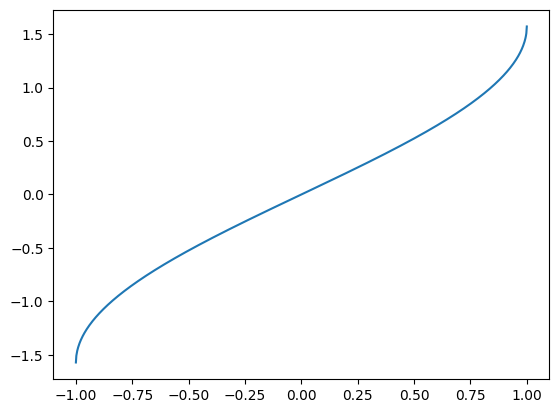

In [21]:
plt.plot(interval, exact_values)

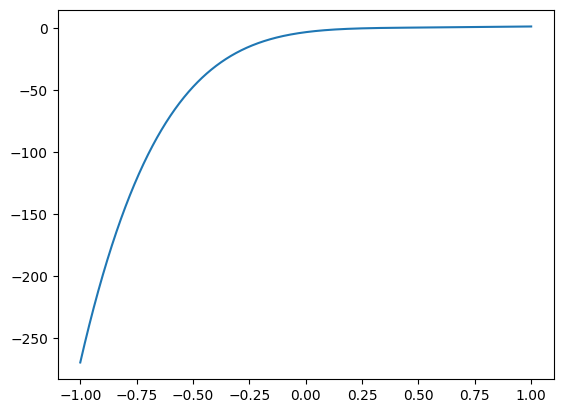

In [22]:
plt.plot(interval, aprox_values)

### Solución Punto 3.b

In [23]:
pol, bound = pm.taylor_remainder_bound(f, x, x_0, 5, 1)

In [24]:
pol # la 6ta derivada

15*x*(63*x**4 - 70*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/(1 - x**2)**(11/2)

In [25]:
bound # error numerico de |R_n(x)|

inf

## Solción Punto 3.c

In [26]:
interval = np.linspace(0.75, 1, 1000) # aproximación con 1000 puntos

#### Aproximación con P5

In [27]:
result =0 
for i in interval:
    result += P5.evalf(subs={x: i})

In [28]:
result

1083.65857040177

#### Resultado exacto con $\arcsin(x)$

In [29]:
resultado_exacto = sp.integrate(f, (x, 0.75, 1))

In [30]:
resultado_exacto

-1.29748438700226 + pi/2

In [31]:
# error absoluto
pm.absolute_error(resultado_exacto, result)

1084.95605478877 - pi/2

In [32]:
## error relativo
pm.relative_error(resultado_exacto, result)

(1084.95605478877 - pi/2)/(-1.29748438700226 + pi/2)